In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from iminuit import minimize

from combined_fit import spectrum as sp
from combined_fit import minimizer as minim
from combined_fit import tensor as ts
from combined_fit import mass
from combined_fit import constant
from combined_fit import draw

/Users/adminlocal/Desktop/micro_combined_fit/combined_fit/minimizer.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/adminlocal/Desktop/micro_combined_fit/combined_fit/minimizer.py:41: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


In [2]:
#Injected masses
A= [1, 4,14,28,56]
Z= [1, 2, 7,14, 26]

hadr_model = "Sibyll" #"Sibyll" or "EPOS-LHC"
logRmin = 17.8 #Integrate the injected spectrum from logR_min to get total energy x k
logE_th = 18.75 # Compute the all-particle spectral deviance from logE_th 	
isSFR = False # Or False for SMD

#Initial guess
sigma_shiftXmax = 1
if isSFR:
    init_logRcut, init_gamma_nucl, init_gamma_p =  18.24, -0.46, 3.54
    init_E_times_k = [1.79E+46, 8.18E+45, 1.96E+46, 8.55E+45, 1.52E45]
    bnds_E_times_k = [[1E40, 1E50]]*len(ts.A)
    unit_E_times_k = "erg per solar mass"
else: 
    init_logRcut, init_gamma_nucl, init_gamma_p =  18.33, 0.30, 3.44
    init_E_times_k = [2.63E+36, 6.20E+35, 9.23E+35, 3.73E+35, 1.36E35]
    bnds_E_times_k = [[1E30, 1E40]]*len(ts.A)  
    unit_E_times_k = "erg per solar mass per year"

In [3]:
parameters = np.concatenate((init_E_times_k, [sigma_shiftXmax, init_logRcut, init_gamma_nucl, init_gamma_p]))
    
bnds_shiftXmax_logRcut_gammanucl_gammap = ( (-5,5), (18., 19.), (-4, 4), (-4, 4)) 
bnds = np.concatenate((bnds_E_times_k, bnds_shiftXmax_logRcut_gammanucl_gammap))

#Distribution of Sources
if isSFR: key = "sfrd"#M Mpc-3 yr-1 
else: key = "smd"#M Mpc-3
S_z = ts.Load_evol(file = key+"_local.dat", key=key)

In [4]:
#Loading spectrum and composition
t_EJ = sp.load_Spectrum_Data() # load spectrum
t_EJp = sp.load_ProtonSpectrum_Data(hadr_model) # load proton spectrum
t_Xmax = mass.load_Xmax_data() # load Xmax
mini = minim.Minimize_Spectrum_And_Xmax # For minimizing spectrum and Xmax moments deviance
    

In [5]:
#Do the minimization
Tensor = ts.upload_Tensor(logRmin = logRmin)
args = [[Tensor, ts.A, ts.Z, t_EJ, t_EJp, t_Xmax, logE_th, hadr_model, S_z]] # fit Xmax moments
res = minimize(mini, parameters, tol=1e-5, options={'maxfev': 10000, 'disp': False, 'stra': 1}, bounds=bnds, args=args) # change disp to True if you want to increase the verbosity of the minimizer
#res.minuit.minos()
#res.minuit.draw_mnprofile('x6')   
E_times_k, sigma_shift_sys, logRcut, gamma_nucl, gamma_p = minim.Results(res, len(ts.A), constant.Masses, unit_E_times_k, logRmin, verbose = True)


Minimum energy above which flux is computed is below logRmin
Setting Emin to Rmin: 17.8


/Users/adminlocal/Desktop/micro_combined_fit/combined_fit/minimizer.py:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Xmax_Minimization" failed type inference due to: non-precise type pyobject
During: typing of argument at /Users/adminlocal/Desktop/micro_combined_fit/combined_fit/minimizer.py (9)

File "../combined_fit/minimizer.py", line 9:

@jit
^

  @jit
/opt/anaconda3/envs/micro_combined_fit_test/lib/python3.11/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "Xmax_Minimization" was compiled in object mode without forceobj=True.

File "../combined_fit/minimizer.py", line 10:
@jit
def Xmax_Minimization(parms, args, w_zR, w_zR_p):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/opt/anaconda3/envs/micro_combined_fit_test/lib/python3.11/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been 

Spectrum deviance:  20.58  | Composition deviance:  35.82   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6299999999999845e+36   6.200000000000036e+35   9.229999999999959e+35   3.729999999999943e+35   1.3599999999999978e+35
Spectrum deviance:  20.58  | Composition deviance:  35.82   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6302630098604916e+36   6.200000000000036e+35   9.229999999999959e+35   3.729999999999943e+35   1.3599999999999978e+35
Spectrum deviance:  20.58  | Composition deviance:  35.82   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6297370032863518e+36   6.200000000000036e+35   9.229999999999959e+35   3.729999999999943e+35   1.3599999999999978e+35
Spectrum deviance:  20.58  | Composition deviance:  35.82   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6306836946905815e+36   6.200000000000036e+35   9.229999999999959e+35   3.729999999999943e+35   1.3599999999999978e+35
Spectrum deviance:  20.58  | Composition deviance:  35.82   | gamma:

Spectrum deviance:  20.6  | Composition deviance:  35.79   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.625256972564177e+36   6.199290775304332e+35   9.229524109417464e+35   3.730427449145152e+35   1.3602989426775762e+35
Spectrum deviance:  20.6  | Composition deviance:  35.79   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.625256972564177e+36   6.199290775304332e+35   9.230234868375202e+35   3.730881373249984e+35   1.3602989426775762e+35
Spectrum deviance:  20.6  | Composition deviance:  35.79   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.625256972564177e+36   6.199290775304332e+35   9.230234868375202e+35   3.7299735526547745e+35   1.3602989426775762e+35
Spectrum deviance:  20.6  | Composition deviance:  35.79   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.625256972564177e+36   6.199290775304332e+35   9.230234868375202e+35   3.730427449145152e+35   1.3605739095026931e+35
Spectrum deviance:  20.61  | Composition deviance:  35.78   | gamma:  0.3  

Spectrum deviance:  20.61  | Composition deviance:  35.78   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6263259104253623e+36   6.197011173068753e+35   9.22953018349328e+35   3.730110730436823e+35   1.3600064385480778e+35
Spectrum deviance:  20.61  | Composition deviance:  35.78   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270119740945558e+36   6.197594890353117e+35   9.22953018349328e+35   3.730110730436823e+35   1.3600064385480778e+35
Spectrum deviance:  20.61  | Composition deviance:  35.78   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270119740945558e+36   6.196427483272578e+35   9.22953018349328e+35   3.730110730436823e+35   1.3600064385480778e+35
Spectrum deviance:  20.61  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270119740945558e+36   6.197011173068753e+35   9.230240943020846e+35   3.730110730436823e+35   1.3600064385480778e+35
Spectrum deviance:  20.61  | Composition deviance:  35.78   | gamma:  0

Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.45   2.6299690204998192e+36   6.193946656509052e+35   9.22926848860758e+35   3.730357635849659e+35   1.3597924286738268e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.45   2.629779780779487e+36   6.193794944872457e+35   9.229255192504917e+35   3.730333530772989e+35   1.3597269778134904e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.45   2.6290549728144998e+36   6.1932138401051984e+35   9.229204262702035e+35   3.730241198501563e+35   1.3594762869506146e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.45   2.629741015184697e+36   6.1932138401051984e+35   9.229204262702035e+35   3.730241198501563e+35   1.3594762869506146e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma: 

Spectrum deviance:  20.64  | Composition deviance:  35.74   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627629839306325e+36   6.191788265185359e+35   9.229057467045671e+35   3.730313856281273e+35   1.3595966060087832e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627629839306325e+36   6.191788265185359e+35   9.229057467045671e+35   3.730313856281273e+35   1.3595966060087832e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627629839306325e+36   6.191788265185359e+35   9.229057467045671e+35   3.730313856281273e+35   1.3595966060087832e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627629839306325e+36   6.191788265185359e+35   9.229057467045671e+35   3.730313856281273e+35   1.3595966060087832e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.

Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626782994395816e+36   6.194178786311461e+35   9.227740021407659e+35   3.727529177290468e+35   1.3612406479293268e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626782994395816e+36   6.1930116977503946e+35   9.227740021407659e+35   3.727529177290468e+35   1.3612406479293268e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626782994395816e+36   6.193595228286754e+35   9.228450712863561e+35   3.727529177290468e+35   1.3612406479293268e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626782994395816e+36   6.193595228286754e+35   9.227029357315816e+35   3.727529177290468e+35   1.3612406479293268e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0

Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626851111727218e+36   6.193625247024448e+35   9.227830735022704e+35   3.727634146785275e+35   1.361159146175744e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6268561969427366e+36   6.193648450020876e+35   9.2278797284848e+35   3.727631454493476e+35   1.3611441140230284e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6268689100029908e+36   6.193706457701905e+35   9.228002212709324e+35   3.7276247237683e+35   1.3611065340044214e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6269070493683204e+36   6.193880482374904e+35   9.228369670259292e+35   3.727604531629361e+35   1.3609937970612035e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3 

Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270654126997602e+36   6.194744712341355e+35   9.23060628095523e+35   3.727554224346266e+35   1.3602333078077834e+35
Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270654126997602e+36   6.194744712341355e+35   9.23060628095523e+35   3.727554224346266e+35   1.3602333078077834e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270654126997602e+36   6.194744712341355e+35   9.23060628095523e+35   3.727554224346266e+35   1.3602333078077834e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270654126997602e+36   6.194744712341355e+35   9.23060628095523e+35   3.727554224346266e+35   1.3602333078077834e+35
Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.

Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627028624347872e+36   6.19493377133732e+35   9.22971551246369e+35   3.727835159703238e+35   1.360052235574669e+35
Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627028624347872e+36   6.19493377133732e+35   9.230426278699181e+35   3.72828892730997e+35   1.360052235574669e+35
Spectrum deviance:  20.63  | Composition deviance:  35.75   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627028624347872e+36   6.19493377133732e+35   9.230426278699181e+35   3.7273814197111096e+35   1.360052235574669e+35
Spectrum deviance:  20.63  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.627028624347872e+36   6.19493377133732e+35   9.230426278699181e+35   3.727835159703238e+35   1.360327177583431e+35
Spectrum deviance:  20.64  | Composition deviance:  35.75   | gamma:  0.3   | log

Spectrum deviance:  20.62  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6277450707345488e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.626373952970066e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.20045857884991e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.199290904826504e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3 

Spectrum deviance:  20.62  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6271965807030907e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6269223571502222e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.62708688956491e+36   6.199874728094176e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3 

Spectrum deviance:  20.62  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.200458578872288e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.77   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.200458578872288e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.44   2.6270594671380875e+36   6.200458578872288e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.3   | logRcut :  18.33 | gamma p  3.45   2.6270594671380875e+36   6.200458578872288e+35   9.22568348206201e+35   3.731706359947759e+35   1.3586176771980275e+35
Spectrum deviance:  20.62  | Composition deviance:  35.76   | gamma:  0.

Saving plot as uhecr_spectrum_inj_smd.pdf
Saving plot as uhecr_spectrum_det_smd.pdf
Saving plot as uhecr_atmospheric_depth_smd.pdf


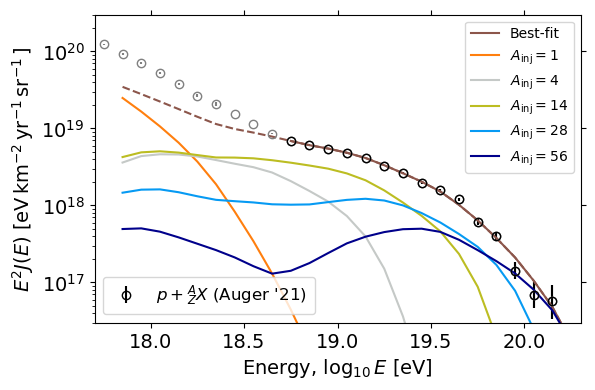

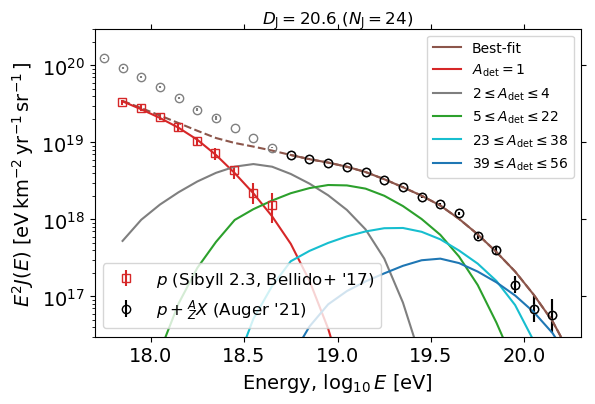

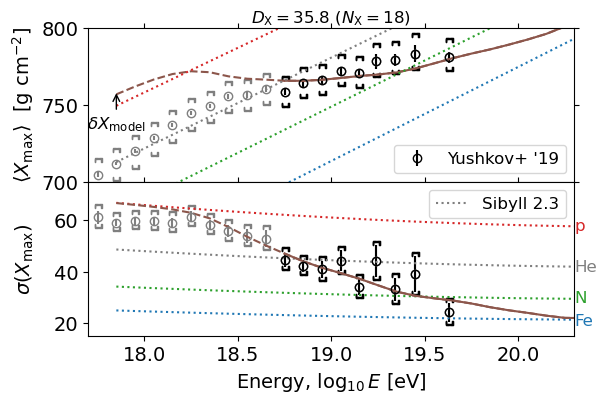

In [6]:
#Plot the results
w_zR_nucl = sp.weight_tensor(S_z, gamma_nucl, logRcut)
w_zR_p = sp.weight_tensor(S_z, gamma_p, logRcut)
    
plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})    
sp.Plot_spectrum(Tensor, E_times_k, ts.A, ts.Z, w_zR_nucl, w_zR_p, logE_th, hadr_model, isE3dJdE= False, ext_save=key)
mass.Plot_Xmax(Tensor, E_times_k, sigma_shift_sys, ts.A, ts.Z, w_zR_nucl, w_zR_p, logE_th, hadr_model, ext_save=key)
